# Tarea 2: Santiago Ontañón Sánchez

## 1. Histogramas

Lo primero que vemos es la documentación de la función `randn`:

In [1]:
?randn

search: 

```
randn([rng], [dims...])
```

Generate a normally-distributed random number with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers.


Un ejemplo:

In [2]:
randn()

randn randn! sprandn randstring rand! rand randexp randperm randjump



0.050111399518670885

El ejercicio pide explícitamente que se generen números de tipo `Float64`, pero esto es por default:

In [3]:
typeof(ans)

Float64

Ahora, crear $N$ valores es trivial utilizando la función `randn(N)`, definiendo $N$:

In [4]:
N = 10000

10000

In [5]:
data = randn(N);

In [6]:
typeof(data)

Array{Float64,1}

Ahora quisiéramos inicializar el arreglo $n_{hist}$ pero para hacer esto necesitamos el máximo y mínimos del arreglo `data` y el número de `bins` que vamos a hacer. Este es el argumento de la función que vamos a implementar, pero para empezar, un buen número corresponde a tener $N/100$ `bins`. 

In [7]:
n_bins = 100

100

Ahora utilizamos las funciones `maximum` y `minimum` para obtener la separación entre `bins`.

In [8]:
sup = maximum(data)

3.8794100863940666

In [9]:
inf = minimum(data)

-3.9080686684875463

In [10]:
len_bin = (sup - inf)/n_bins

0.07787478754881613

Ahora podemos inicializar el arreglo $n_{hist}$ como uno con puros zeros(de tipo `Int64`) y de dimensión $n_{bins}$:

In [11]:
n_hist = zeros(Int64, n_bins)

100-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

Ahora viene la parte clave del ejercicio, leer los datos y organizarlos en cada `bin`. Queremos leer un dato sólo una vez, es decir, no queremos recorrer los `bins` y adentro de cada `bin` recorrer todos los datos para ver si cada uno está en dicho `bin` porque así se leerían los datos $n_{bin}$ veces. Lo que se hace es sacar para cada dato su índice que le corresponde. Esto se hace contanto desde el ínfimo y dividiendo entre la longitud del `bin`. Por ejemplo, para el mínimo:

In [12]:
floor(Int64,(minimum(data)-inf)/len_bin)

0

Lo que significa que está en el índice 0 + 1 del arreglo $n_{hist}$, cosa que tiene sentido. Sin embargo, hay un problema para los valores para los cuales se tiene un dato igual a `maximum(data)`:

In [13]:
floor(Int64, (maximum(data)-inf)/len_bin)

100

I.e. está en el índice 100 + 1 = 101, que está fuera de rango para nuestro arreglo de longitud $n_{bins}$. Lo que hacemos es meter estos valores en el bin anterior. Ahora es muy claro cómo obtenemos cada índice para cada dato `d` con un ciclo `for`.

In [14]:
for d in data
    i = floor(Int64, (d-inf)/len_bin) + 1
    i = (i > n_bins) ? n_bins : i
    n_hist[i] = n_hist[i] + 1
end

In [15]:
n_hist

100-element Array{Int64,1}:
 1
 0
 0
 0
 0
 1
 1
 1
 2
 2
 2
 2
 6
 ⋮
 5
 2
 2
 2
 1
 1
 2
 0
 0
 0
 1
 1

Ahora simplemente graficamos nuestro histograma:

In [16]:
using PyPlot

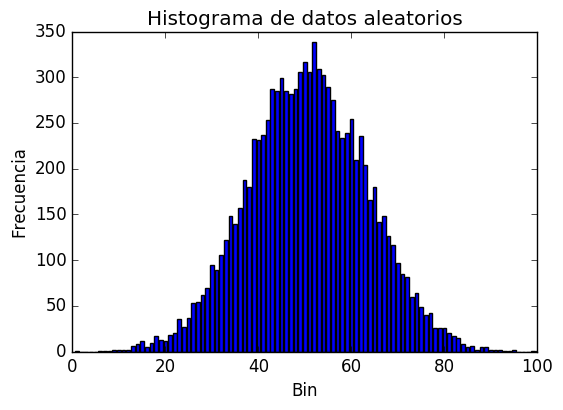

In [17]:
# Vamos a graficar usando un bar_plot, bar de PyPlot. Esta función tiene
# como entrada básica bar(x,y) donde x y y son arreglos del mismo tamaño,
# x corresponde a la variable independiente y y a la dependiente que se
# grafica como una barra. Por eso necesitamos el arreglo x que nos da el
# bin correspondiente.
x = [1:1:n_bins;]
fig = figure("pyplot_barplot", figsize = (6,4))
b = bar(x,n_hist, color="b",align="center")
title("Histograma de datos aleatorios")
xlabel("Bin")
ylabel("Frecuencia")
xlim(0,100)
show()

Con todo lo anterior que muestra cómo funciona el proceso de obtener el resultado ahora sí lo implementamos en una sola función:

In [18]:
""" 
histogram_randn(n_bins)

Esta función toma como entrada un entero n_bins (y solamente un entero, de otro
modo es inválida). Primero se calcula un arreglo de datos con números aleatorios.
Dicho arreglo abarca un intervalo [minimum(data), maximum(data)] que se parte en
n_bins subintervalos del mismo tamaño. Se regresa un n_hist tipo Array{Int64,1} 
de dimensión n_bins que trae en la entrada n_hist[i] el número de datos que
entraron en dicho intervalo.
"""
function histogram_randn{T <: Int64}(n_bins::T)
    # Lo primero que se hace es verificar que efectivamente n_bin es un número
    # entero, de otro modo la función no corre.
    # Después tenemos que generar nuestros datos. El número es arbitrario
    # y lo elegimos como dice el inciso, N = 10000.
    N = 10000
    data = randn(N)
    # Con el arreglo lleno de datos, procedemos a encontrar los supremos e
    # ínfimos.
    sup = maximum(data)
    inf = minimum(data)
    # Con estos valores se puede calcular len_bin
    len_bin = (sup - inf)/n_bins
    # Ahora se inicializa el arreglo de tamaño n_bins que tiene las frecuencias
    # no normalizadas. Se inicializa naturalmente, lleno de ceros.
    n_hist = zeros(Int64, n_bins)
    # Después, con un ciclo for, se le asigna a cada dato un índice que es su
    # número de bin y dicho bin se incrementa en uno.
    for d in data
        i = floor(Int64, (d-inf)/len_bin) + 1 # Como se ve, se está calculando el
        # número de longitudes len_bin que se encuentra un dato desde el mínimo
        # este número de longitudes más uno (pues el mínimo está en el bin
        # 1 no el bin 0) es el índice. Excepto si...
        i = (i > n_bins) ? n_bins : i # Esta sutileza viene de la convención de que
        # n_hist[1] es el primer bin y debe contener a minimum(data), pero del mismo
        # modo n_hist[n_bins] contiene al último bin y dentro se considera a 
        # maximum(data), sólo que nuestro indexado de la línea anterior lo
        # metería en el siguiente bin y estaría fuera de rango. Lo que se hace es
        # meter este valor en el último bin con un sencillo if.
        n_hist[i] = n_hist[i] + 1
    end
    # Finalmente se regresa el arreglo de frecuencias.
    # Vamos a graficar usando un bar_plot, bar de PyPlot. Esta función tiene
    # como entrada básica bar(x,y) donde x y y son arreglos del mismo tamaño,
    # x corresponde a la variable independiente y y a la dependiente que se
    # grafica como una barra. Por eso necesitamos el arreglo x que nos da el
    # bin correspondiente.
    x = [1:1:n_bins;]
    fig = figure("pyplot_barplot", figsize = (6,4))
    b = bar(x,n_hist, color="b",align="center")
    title("Histograma de datos aleatorios")
    xlabel("Bin")
    ylabel("Frecuencia")
    xlim(0,n_bins)
    show()
    return n_hist
end

histogram_randn (generic function with 1 method)

Ahora se dan unos ejemplos. Para diez puntos:

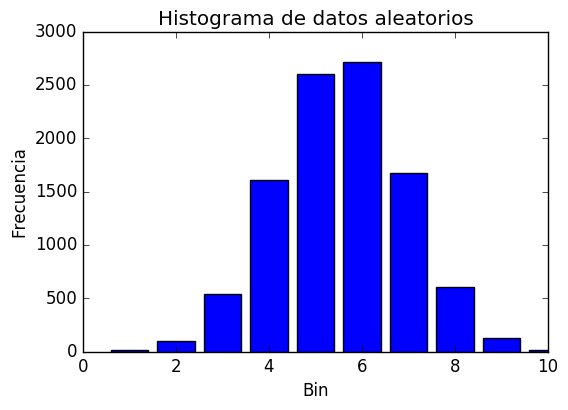

In [19]:
histogram_randn(10);

Veamos ahora 1000 bins: 

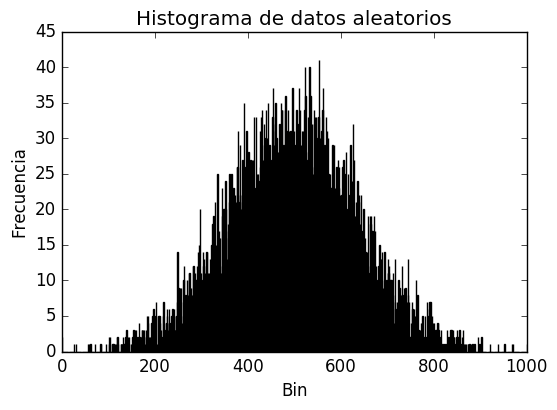

In [20]:
histogram_randn(1000);

Se ve que si se hace un número de divisiones del orden o mayor al número de datos se pierde por completo la forma porque ahora en cada `bin` sólo hay a veces un sólo dato aunque se esté en la región del máximo de la gaussiana. Con esto en mente, modificamos la función para que no nos deje hacer estas cosas:

In [21]:
""" 
histogram_randn_pretty(n_bins)

Esta función toma como entrada un entero n_bins (y solamente un entero, de otro
modo es inválida). Primero se calcula un arreglo de datos con números aleatorios.
Dicho arreglo abarca un intervalo [minimum(data), maximum(data)] que se parte en
n_bins subintervalos del mismo tamaño. Se regresa un n_hist tipo Array{Int64,1} 
de dimensión n_bins que trae en la entrada n_hist[i] el número de datos que
entraron en dicho intervalo.

Si n_bins es mayor que el número de datos N = 10000 se toma por default
n_bins = floor(N/10).
"""
function histogram_randn_pretty{T <: Int64}(n_bins::T)
    # Lo primero que se hace es verificar que efectivamente n_bin es un número
    # entero, de otro modo la función no corre.
    # Después tenemos que generar nuestros datos. El número es arbitrario
    # y lo elegimos como dice el inciso, N = 10000.
    N = 10000
    # Ahora la condición de que nbins no sea mayor que floor(N/100)
    n_bins = (n_bins < floor(Int64,N/100)) ? n_bins : floor(Int64,N/100)
    data = randn(N)
    # Con el arreglo lleno de datos, procedemos a encontrar los supremos e
    # ínfimos.
    sup = maximum(data)
    inf = minimum(data)
    # Con estos valores se puede calcular len_bin
    len_bin = (sup - inf)/n_bins
    # Ahora se inicializa el arreglo de tamaño n_bins que tiene las frecuencias
    # no normalizadas. Se inicializa naturalmente, lleno de ceros.
    n_hist = zeros(Int64, n_bins)
    # Después, con un ciclo for, se le asigna a cada dato un índice que es su
    # número de bin y dicho bin se incrementa en uno.
    for d in data
        i = floor(Int64, (d-inf)/len_bin) + 1 # Como se ve, se está calculando el
        # número de longitudes len_bin que se encuentra un dato desde el mínimo
        # este número de longitudes más uno (pues el mínimo está en el bin
        # 1 no el bin 0) es el índice. Excepto si...
        i = (i > n_bins) ? n_bins : i # Esta sutileza viene de la convención de que
        # n_hist[1] es el primer bin y debe contener a minimum(data), pero del mismo
        # modo n_hist[n_bins] contiene al último bin y dentro se considera a 
        # maximum(data), sólo que nuestro indexado de la línea anterior lo
        # metería en el siguiente bin y estaría fuera de rango. Lo que se hace es
        # meter este valor en el último bin con un sencillo if.
        n_hist[i] = n_hist[i] + 1
    end
    # Finalmente se regresa el arreglo de frecuencias.
    # Vamos a graficar usando un bar_plot, bar de PyPlot. Esta función tiene
    # como entrada básica bar(x,y) donde x y y son arreglos del mismo tamaño,
    # x corresponde a la variable independiente y y a la dependiente que se
    # grafica como una barra. Por eso necesitamos el arreglo x que nos da el
    # bin correspondiente.
    x = [1:1:n_bins;]
    fig = figure("pyplot_barplot", figsize = (6,4))
    b = bar(x,n_hist, color="b",align="center")
    title("Histograma de datos aleatorios")
    xlabel("Bin")
    ylabel("Frecuencia")
    xlim(0,n_bins)
    show()
    return n_hist
end

histogram_randn_pretty (generic function with 1 method)

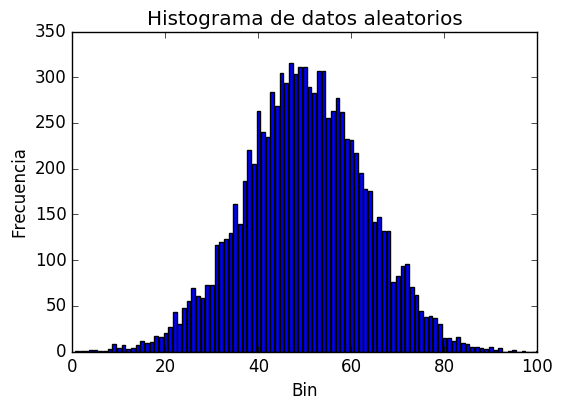

In [22]:
histogram_randn_pretty(100);

Lo último que procede a este ejercicio es implementar la función de PyPlot para histogramas. La referencia es https://gist.github.com/gizmaa/7214002#histogram

Básciamente el uso es `PyPlot.plt.hist(x,nbins)` donde `x` es el arreglo de datos y `nbins` es obviamente el número de `bins` en que se van a partir los datos. La manera de referenciar `PyPlot.plt.hist` es algo distinta en `Julia`.

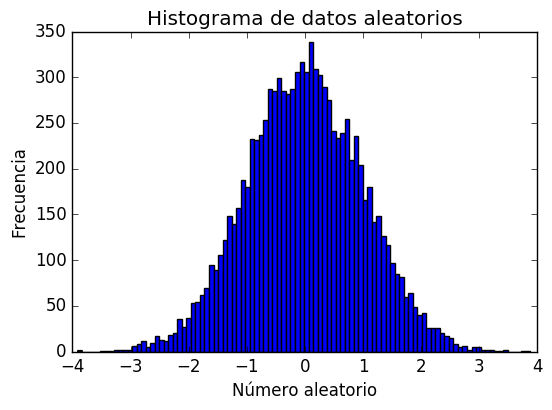

In [23]:
fig = figure("pyplot_histogram",figsize=(6,4))
plt[:hist](data,n_bins)
xlabel("Número aleatorio")
ylabel("Frecuencia")
title("Histograma de datos aleatorios")
show()

## 2. Promedio y varianza

(a). Implementamos rápidamente una función que nos dé los datos aleatorios:

In [24]:
function get_data()
    # Con la función randn podemos crear el arreglo por default
    return randn(10000)
end

function get_data{T <: Int64}(n::T)
    # En el caso de que queramos un número de datos definidos.
    return randn(n)
end

get_data (generic function with 2 methods)

Queremos calcular el promedio de estos datos. Sencillamete debemos sumarlos todos y dividirlos entre la longitud de ellos.

In [25]:
data = get_data()    

10000-element Array{Float64,1}:
 -0.0307566 
 -1.28289   
  0.715531  
  0.616322  
 -1.71624   
 -0.62442   
 -0.52698   
 -0.39157   
  1.40514   
  0.949092  
 -0.864609  
  0.378031  
  0.33559   
  ⋮         
  0.914582  
 -1.09642   
 -0.00700809
 -0.814474  
  0.721693  
  0.395503  
  1.41704   
 -0.129561  
 -0.127024  
  1.69695   
  2.01682   
  0.888183  

In [26]:
"""
get_avg(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
promedio.
"""
function get_avg{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # Se calcula el promedio de manera usual.
    s = 0.0
    for d in data
        s = s + d
    end
    return s/length(data)
end

get_avg (generic function with 1 method)

Para nuestro archivo, el promedio sería:

In [27]:
get_avg(data)

0.0035850184217203107

La varianza se calcula de la manera habitual también:

In [28]:
"""
get_var(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
varianza.
"""
function get_var{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # No queremos arreglos de longitud uno o menos pues son triviales.
    if length(data) <= 1
        return Void
    end
    # Se calcula la varianza de manera usual.
    s = 0.0
    av = get_avg(data) # Obtenemos el promedio con la función anterior.
    for d in data
        s = s + (d-av)^2
    end
    return s/(length(data)-1) # Este length(data) -1 es una cuestión de
    # convención , coincide con la convención que utiliza Julia en su
    # función var(data).
end

get_var (generic function with 1 method)

La varianza $s^2$ para estos datos es

In [29]:
get_var(data)

1.005763669877532

Ahora comprobamos con las funciones de `Julia`:

In [30]:
mean(data)

0.0035850184217203042

In [31]:
var(data)

1.00576366987753

Es claro que coinciden muy bien, la diferencia viene a partir de la cifra 14 decimal. Para ser más claros en cuanto a al comparación, se presentan en forma de tabla:

|Función | Resultado|
|--------|:--------|
|`get_avg`|0.0035850184217203107|
|`mean` |0.0035850184217203042|
|`get_var`|1.005763669877532|
|`var`|1.00576366987753|

En cuanto a su tiempo de cómputo para cada una:

In [32]:
@time get_avg(data); @time get_avg(data)

0.0035850184217203107

In [33]:
@time mean(data); @time mean(data)

0.0035850184217203042

In [34]:
@time get_var(data); @time get_var(data)

1.005763669877532

In [35]:
@time var(data); @time var(data)

1.00576366987753

Se ve que las funciones propias de Julia son más rápidas hasta ahora pero nótese que nuestra función `get_var` ocupa casi la mitad de memoria que la función `var`, seguramente porque el cálculo del promedio se hace afuera. Continuaremos esta discusión en el inciso (c).

(b). Ahora implementamos el algoritmo recursivo.

Para la media:
    $$\bar{x}_n = \bar{x}_{n-1} +\frac{x_n-\bar{x}_{n-1}}{n}$$

In [36]:
"""
get_avg_online(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
promedio de manera recursiva. Véase https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function get_avg_online{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # Se calcula recursivamente la media de acuerdo a la referencia.
    s = 0.0
    for (i, d) in enumerate(data)
        s = s + (d-s)/i 
    end
    return s
end

get_avg_online (generic function with 1 method)

In [37]:
get_avg_online(data)

0.0035850184217203233

Para la varianza volvemos a resaltar que estamos tratando en este caso (para ser consistentes con `Julia`) con la varianza de una muestra. Así el algoritmo que se usa es el que tiene estabilidad numérica seguún la referencia https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm

$$s^2_n = \frac{M_{2,n}}{n-1},\qquad M_{2,n}=M_{2,n-1} + (x_n-\bar{x}_{n-1})(x_n -\bar{x}_n)$$

In [38]:
"""
get_var_online(data)

Toma como entrada un arreglo unidmensional de tipo Float64 y regresa su
varianza de manera recursiva. Véase https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm
"""
function get_var_online{T <: Array{Float64,1}}(data::T)
    # Especificamos el tipo del arreglo.
    # No queremos arreglos de longitud uno o menos pues son triviales.
    if length(data) <= 1
        return Void
    end
    # Se calcula recursivamente la media de acuerdo a la referencia.
    s = 0.0
    M = 0.0
    p = 0.0
    p_new = 0.0
    for (i, d) in enumerate(data)
        if i == 1 # Para el primer dato no se calcula la varianza pero sí
            #las otras cantidades.
            p_new = p + (d-p)/i  # El promedio hasta el dato i según la manera 
            # recursiva de la función anterior.
            M = M + (d-p)*(d-p_new) # La cantidad M_{2,n} según la fórmula.
            # Se ve que se usan los dos promedios anteriores.
            p = p_new # Se reasignan los promedios.
            continue
        end
        p_new = p + (d-p)/i  # El promedio hasta el dato i según la manera 
        # recursiva de la función anterior.
        M = M + (d-p)*(d-p_new)
        p = p_new
        s = M/(i-1)
    end
    return s
end

get_var_online (generic function with 1 method)

La varianza es así:

In [39]:
get_var_online(data)

1.00576366987753

Añadimos estos resultados a nuestra tabla anterior:

|Función | Resultado|
|--------|:--------|
|`get_avg`|0.0035850184217203107|
|`get_avg_online`|0.0035850184217203233|
|`mean` |0.0035850184217203042|
|`get_var`|1.005763669877532|
|`get_var_online`|1.00576366987753|
|`var`|1.00576366987753|

Podemos complementar la discusión con base en la tabla anterior viendo que tenemos para cada caso 15 cifras significativas de acuerdo. Esto es consistente con la definición de un `Float64` de acuerdo a como viene en [wikipedia](https://en.wikipedia.org/wiki/Double-precision_floating-point_format)

(c). Ahora sí vamos a comparar los tiempos de ejecución para distintos datos usando `get_data(n)`. El macro que vamos a utilizar es `@elapsed` porque este devuelve el tiempo de ejecución a diferencia de `@time` que sólo lo imprime.

In [40]:
@elapsed get_var_online(data)

0.000169564

Ahora vamos a hacer una función sencilla que nos devuelva un arreglo con tres columnas, cada columna con el tiempo de los tres métodos distintos. Serán cinco filas correspondiente la fila $i$ a un archvio de $10^{1+i}$ datos.

In [41]:
function three_methods_avg()
    t = Array{Float64}(5,3) # Se inicializa el arreglo.
    t1 = 0.0
    t2 = 0.0
    t3 = 0.0
    n = 10
    i = 1
    while n <= 100000
        data = get_data(n) # Se obtienen los n datos.
        t1 = @elapsed get_avg(data)
        t1 = @elapsed get_avg(data) # Se ejecutan dos veces los tiempos
        # de compilación.
        t2 = @elapsed mean(data)
        t2 = @elapsed mean(data)
        t3 = @elapsed get_avg_online(data)
        t3 = @elapsed get_avg_online(data)
        t[i,1] = t1 # Se escriben al arreglo.
        t[i,2] = t2
        t[i,3] = t3
        i = i + 1 # Se aumenta el contador y el orden de magnitud de n.
        n = n * 10
    end
    return t
end

three_methods_avg (generic function with 1 method)

0.000020 seconds (149 allocations: 10.167 KB)
  0.000018 seconds (5 allocations: 176 bytes)
  0.000007 seconds (5 allocations: 176 bytes)
  0.000006 seconds (5 allocations: 176 bytes)
  0.000023 seconds (5 allocations: 176 bytes)
  0.000022 seconds (5 allocations: 176 bytes)
  0.000015 seconds (8 allocations: 288 bytes)
  0.000012 seconds (8 allocations: 288 bytes)


In [42]:
avg_times = three_methods_avg()

5x3 Array{Float64,2}:
 8.2e-8       8.8e-8     1.38e-7    
 2.0e-7       2.14e-7    8.8e-7     
 1.388e-6     5.88e-7    8.652e-6   
 1.3415e-5    5.853e-6   8.4941e-5  
 0.000152343  6.9749e-5  0.000913712

Una función completamente análoga para la varianza.

In [43]:
function three_methods_var()
    t = Array{Float64}(5,3) # Se inicializa el arreglo.
    t1 = 0.0
    t2 = 0.0
    t3 = 0.0
    n = 10
    i = 1
    while n <= 100000
        data = get_data(n) # Se obtienen los n datos.
        t1 = @elapsed get_var(data)
        t1 = @elapsed get_var(data) # Se ejecutan dos veces los tiempos
        # de compilación.
        t2 = @elapsed var(data)
        t2 = @elapsed var(data)
        t3 = @elapsed get_var_online(data)
        t3 = @elapsed get_var_online(data)
        t[i,1] = t1 # Se escriben al arreglo.
        t[i,2] = t2
        t[i,3] = t3
        i = i + 1 # Se aumenta el contador y el orden de magnitud de n.
        n = n * 10
    end
    return t
end

three_methods_var (generic function with 1 method)

In [44]:
var_times = three_methods_var()

5x3 Array{Float64,2}:
 1.32e-7      3.58e-7    1.68e-7    
 2.73e-7      3.5e-7     1.544e-6   
 2.141e-6     9.78e-7    1.5463e-5  
 2.0957e-5    9.264e-6   0.000155426
 0.000211377  9.4135e-5  0.00155427 

Teniendo los arreglos podemos graficarlos.

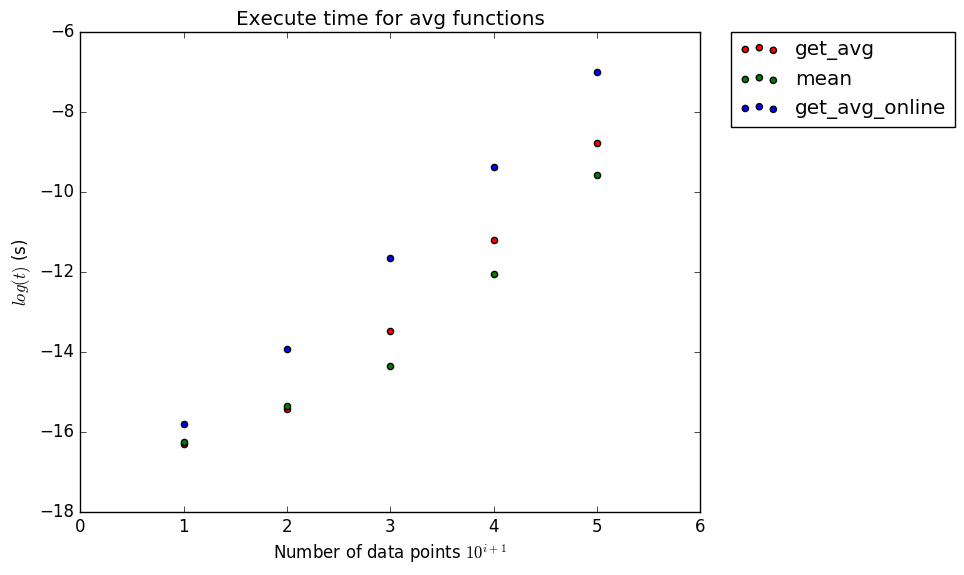

PyObject <matplotlib.legend.Legend object at 0x7fc68f13d690>

In [45]:
a1 = scatter([1,2,3,4,5],log(avg_times[:,1]),c="r",label = "get_avg"); 
a2 = scatter([1,2,3,4,5],log(avg_times[:,2]), c="g", label = "mean"); 
a3 = scatter([1,2,3,4,5],log(avg_times[:,3]), label = "get_avg_online");
title("Execute time for avg functions")
xlabel(L"Number of data points $10^{i+1}$"L)
ylabel(L"$log(t)$ (s)")
legend(handles = [a1,a2,a3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

En rojo se ve la implementación manual `get_avg`, en verde la función de `Julia` `mean` y en azul la implementación recursiva `get_avg_online`

Claramente, la función `mean` tiene el mejor tiempo de ejecución pero la implementación manual no se queda muy atrás, posiblemente porque es tan sencilla. Para el caso de la varianza se ve un efecto completamente igual:

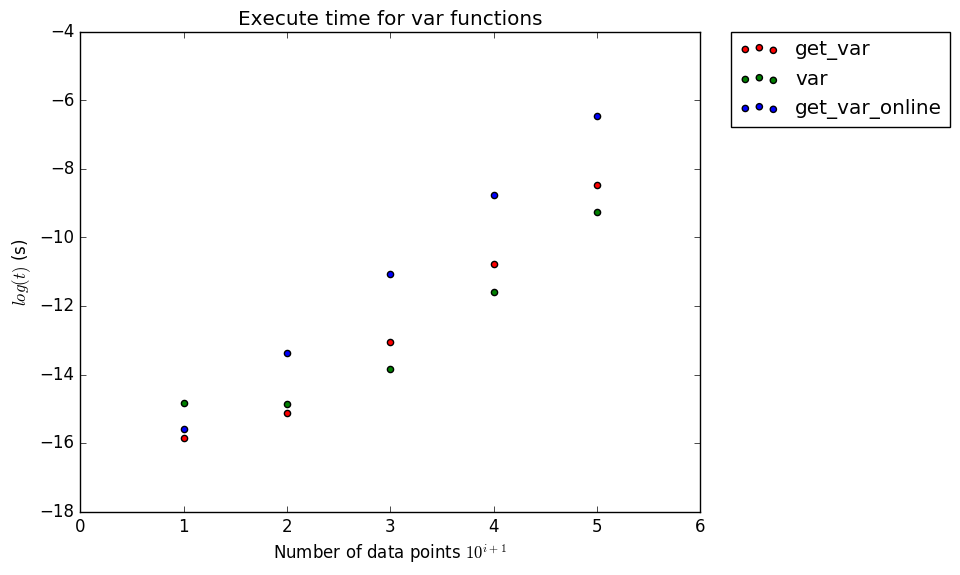

PyObject <matplotlib.legend.Legend object at 0x7fc68efece10>

In [46]:
b1 = scatter([1,2,3,4,5],log(var_times[:,1]),c="r",label = "get_var"); 
b2 = scatter([1,2,3,4,5],log(var_times[:,2]), c="g", label = "var"); 
b3 = scatter([1,2,3,4,5],log(var_times[:,3]), label = "get_var_online");
title("Execute time for var functions")
xlabel(L"Number of data points $10^{i+1}$"L)
ylabel(L"$log(t)$ (s)")
legend(handles = [b1,b2,b3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Método de Simpson

La regla de [simpson](https://en.wikipedia.org/wiki/Simpson%27s_rule) dice que si un intervalo $[a,b]$ está dividido en $n$ subintervalos con $n$ un número par, la aproximación a la integral de una función de una variable est\' dada como

$$\int_a^b f(x)\,dx = \frac{h}{3}\,\left(f(a)+2\,\sum_{j = 1}^{n/2-1}f(x_{2j})+4\,\sum_{j = 1}^{n/2}f(x_{2j-1}) + f(b)\right) $$

donde $h= (b-a)/n$. La implementación es muy clara:

In [47]:
"""
simpson(f,a,b,n)

Se implementa el método de Simpson https://en.wikipedia.org/wiki/Simpson%27s_rule,
para la función f, integrándola entre los valores reales a y b y dividiendo
dicho intervalo en n subintervalos. Si n es par se harán n subintervalos pero si
es impar se harán n+1 intervalos pues se requiere un número par de subintervalos.
Se regresa el valor aproximado de la integral.
"""
function simpson(f::Function, a::Real, b::Real, n::Int64)
    # Lo primero que hacemos después de declarar las variables y ver que
    # n no sea menor que cero, es ver si n, el número de subintervalos es
    #par. Si sí lo es queda igual, si no se aumenta en uno para serlo.
    if n <= 0
        return Void
    end
    n = (n % 2 == 0) ? n : n + 1
    # Ahora se declara h, la subdivisión.
    h = (b-a)/n
    # Del mismo modo, el arreglo de x_1 a x_{n-1}
    x_range = a+h:h:b-h
    # La integral se inicializa con los valores h*(f(a)+f(b))/3.
    i = (f(a)+f(b))*h/3
    # Se inicializa una bandera que nos dice si el valor x_i tiene i impar
    # o par. Empieza en cero, dicendo que es impar con x_1.
    j = 0
    # Se realizan las sumas:
    for x in x_range
        # Primero el caso de x_i con i impar que tiene la suma multiplicada
        # por cuatro según la fórmula.
        if j == 0
            i = i + 4*h*f(x)/3
            # Se cambia la bandera porque la siguiente x_i tendrá i par.
            j = 1
            # Se continua con el siguiente ciclo.
            continue
        end
        # Lo mismo pero ahora para las pares.
        if j ==1
            i = i + 2*h*f(x)/3
            j = 0
            continue
        end
    end
    # Se regresa la integral.
    return i
end

simpson (generic function with 1 method)

Probemos para la función seno:

In [48]:
f(x) = sin(x)

f (generic function with 1 method)

In [49]:
simpson(f,0.0,pi,100)

2.0000000108245035

Se ve con 100 puntos ya se tiene una aproximación hasta la octava cifra decimal, recordemos que el error va como

$$\frac{h^4}{180}\,(b-a)\,\text{max}\left|f^{(4)}(\xi)\right|_{\xi\in[a,b]}$$

Para el caso anterior, `h = pi/100` y la derivada está acotada por 1, así que se predice un error de:

In [50]:
(pi/100)^4*pi/180

1.7001093599182307e-8

Justo en la octava cifra decimal como se dijo.